### Initial Setups

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import cross_val_score
import time
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
#Read data from csv file
data = pd.read_csv('cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.shape

(569, 33)

### Data Understanding

#### 1: Understand data collection process

#### 2: Document data set description (meta data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### 3: Check for missing values

In [5]:
np.sum(data.isnull(), axis = 0)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#### 4: Univariate data analysis

In [6]:
#Check number of unique ids
data['id'].nunique()

569

In [7]:
#Check if there is duplicate rows
print(np.sum(data.duplicated()))

0


In [8]:
#Frequency table for response variable
data['diagnosis'].value_counts(normalize = True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

#### Histogram of numeric variables

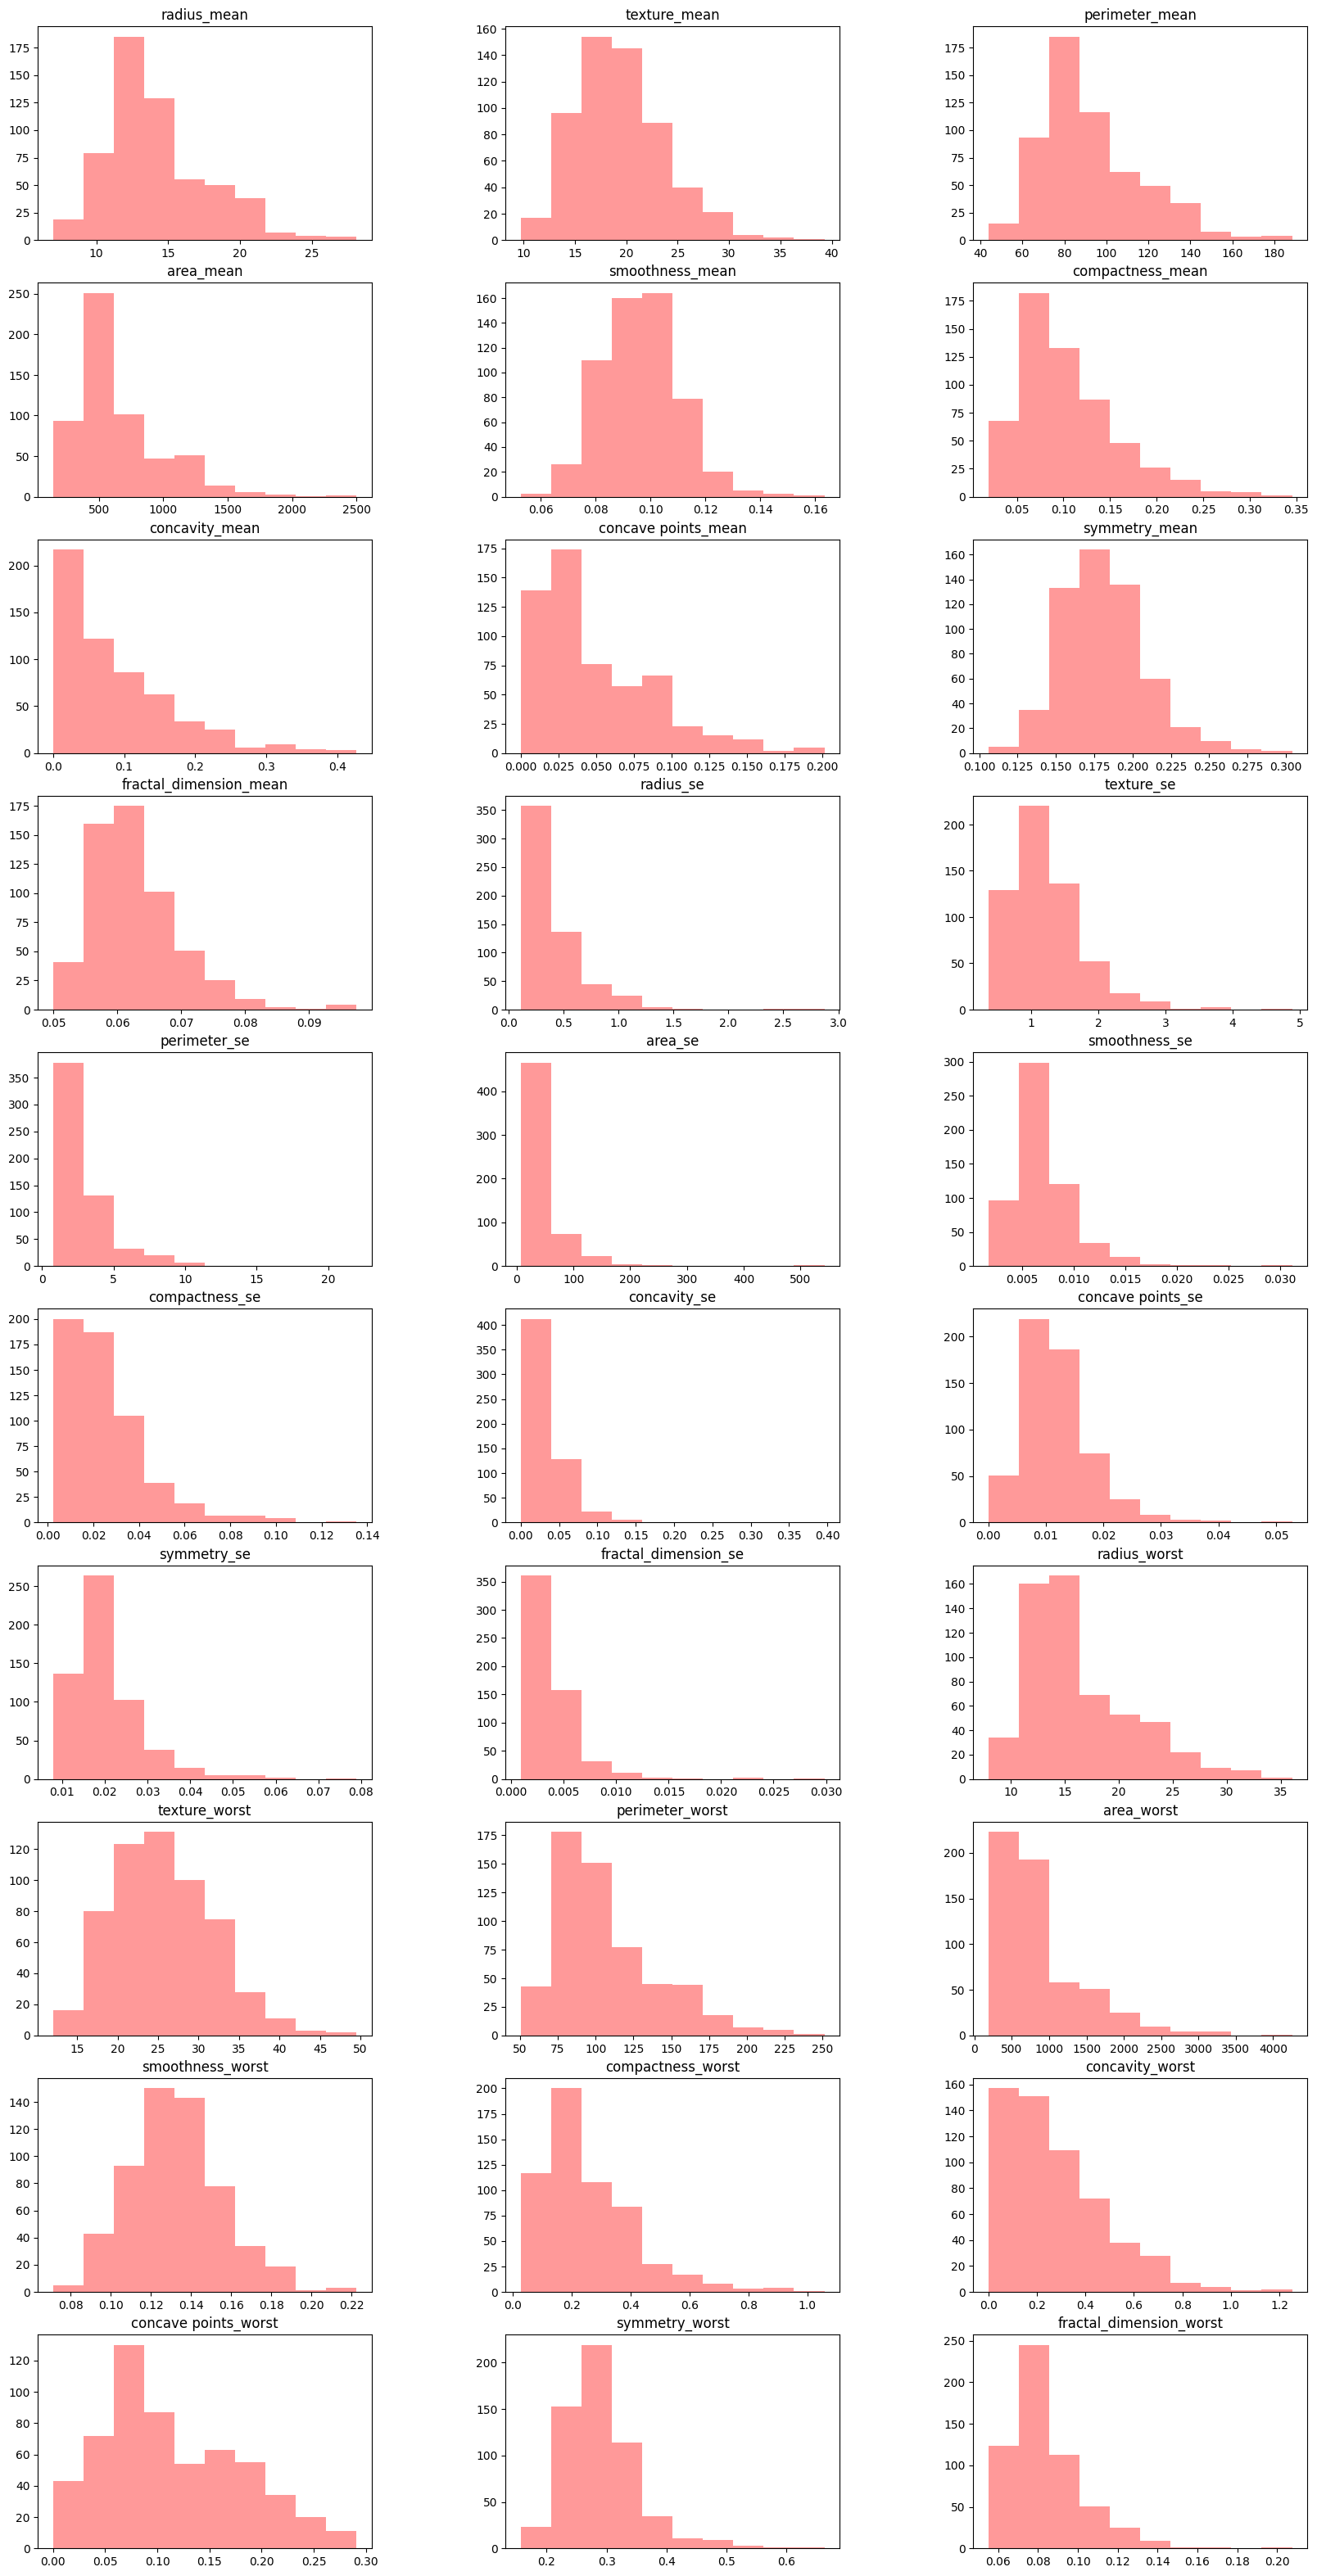

In [9]:
var_ind = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
plt.figure(figsize = (20, 40))
plt.subplots_adjust(hspace = 0.2, wspace = 0.4)
for i in range(1, 31):
    plt.subplot(10, 3, i)
    plt.hist(x = data.iloc[: , var_ind[i - 1]], alpha = 0.4, color = 'red')
    plt.title(data.columns[var_ind[i - 1]])

#### Summary statistics of numeric variables

In [10]:
data.iloc[:, var_ind].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Boxplot of numeric variables

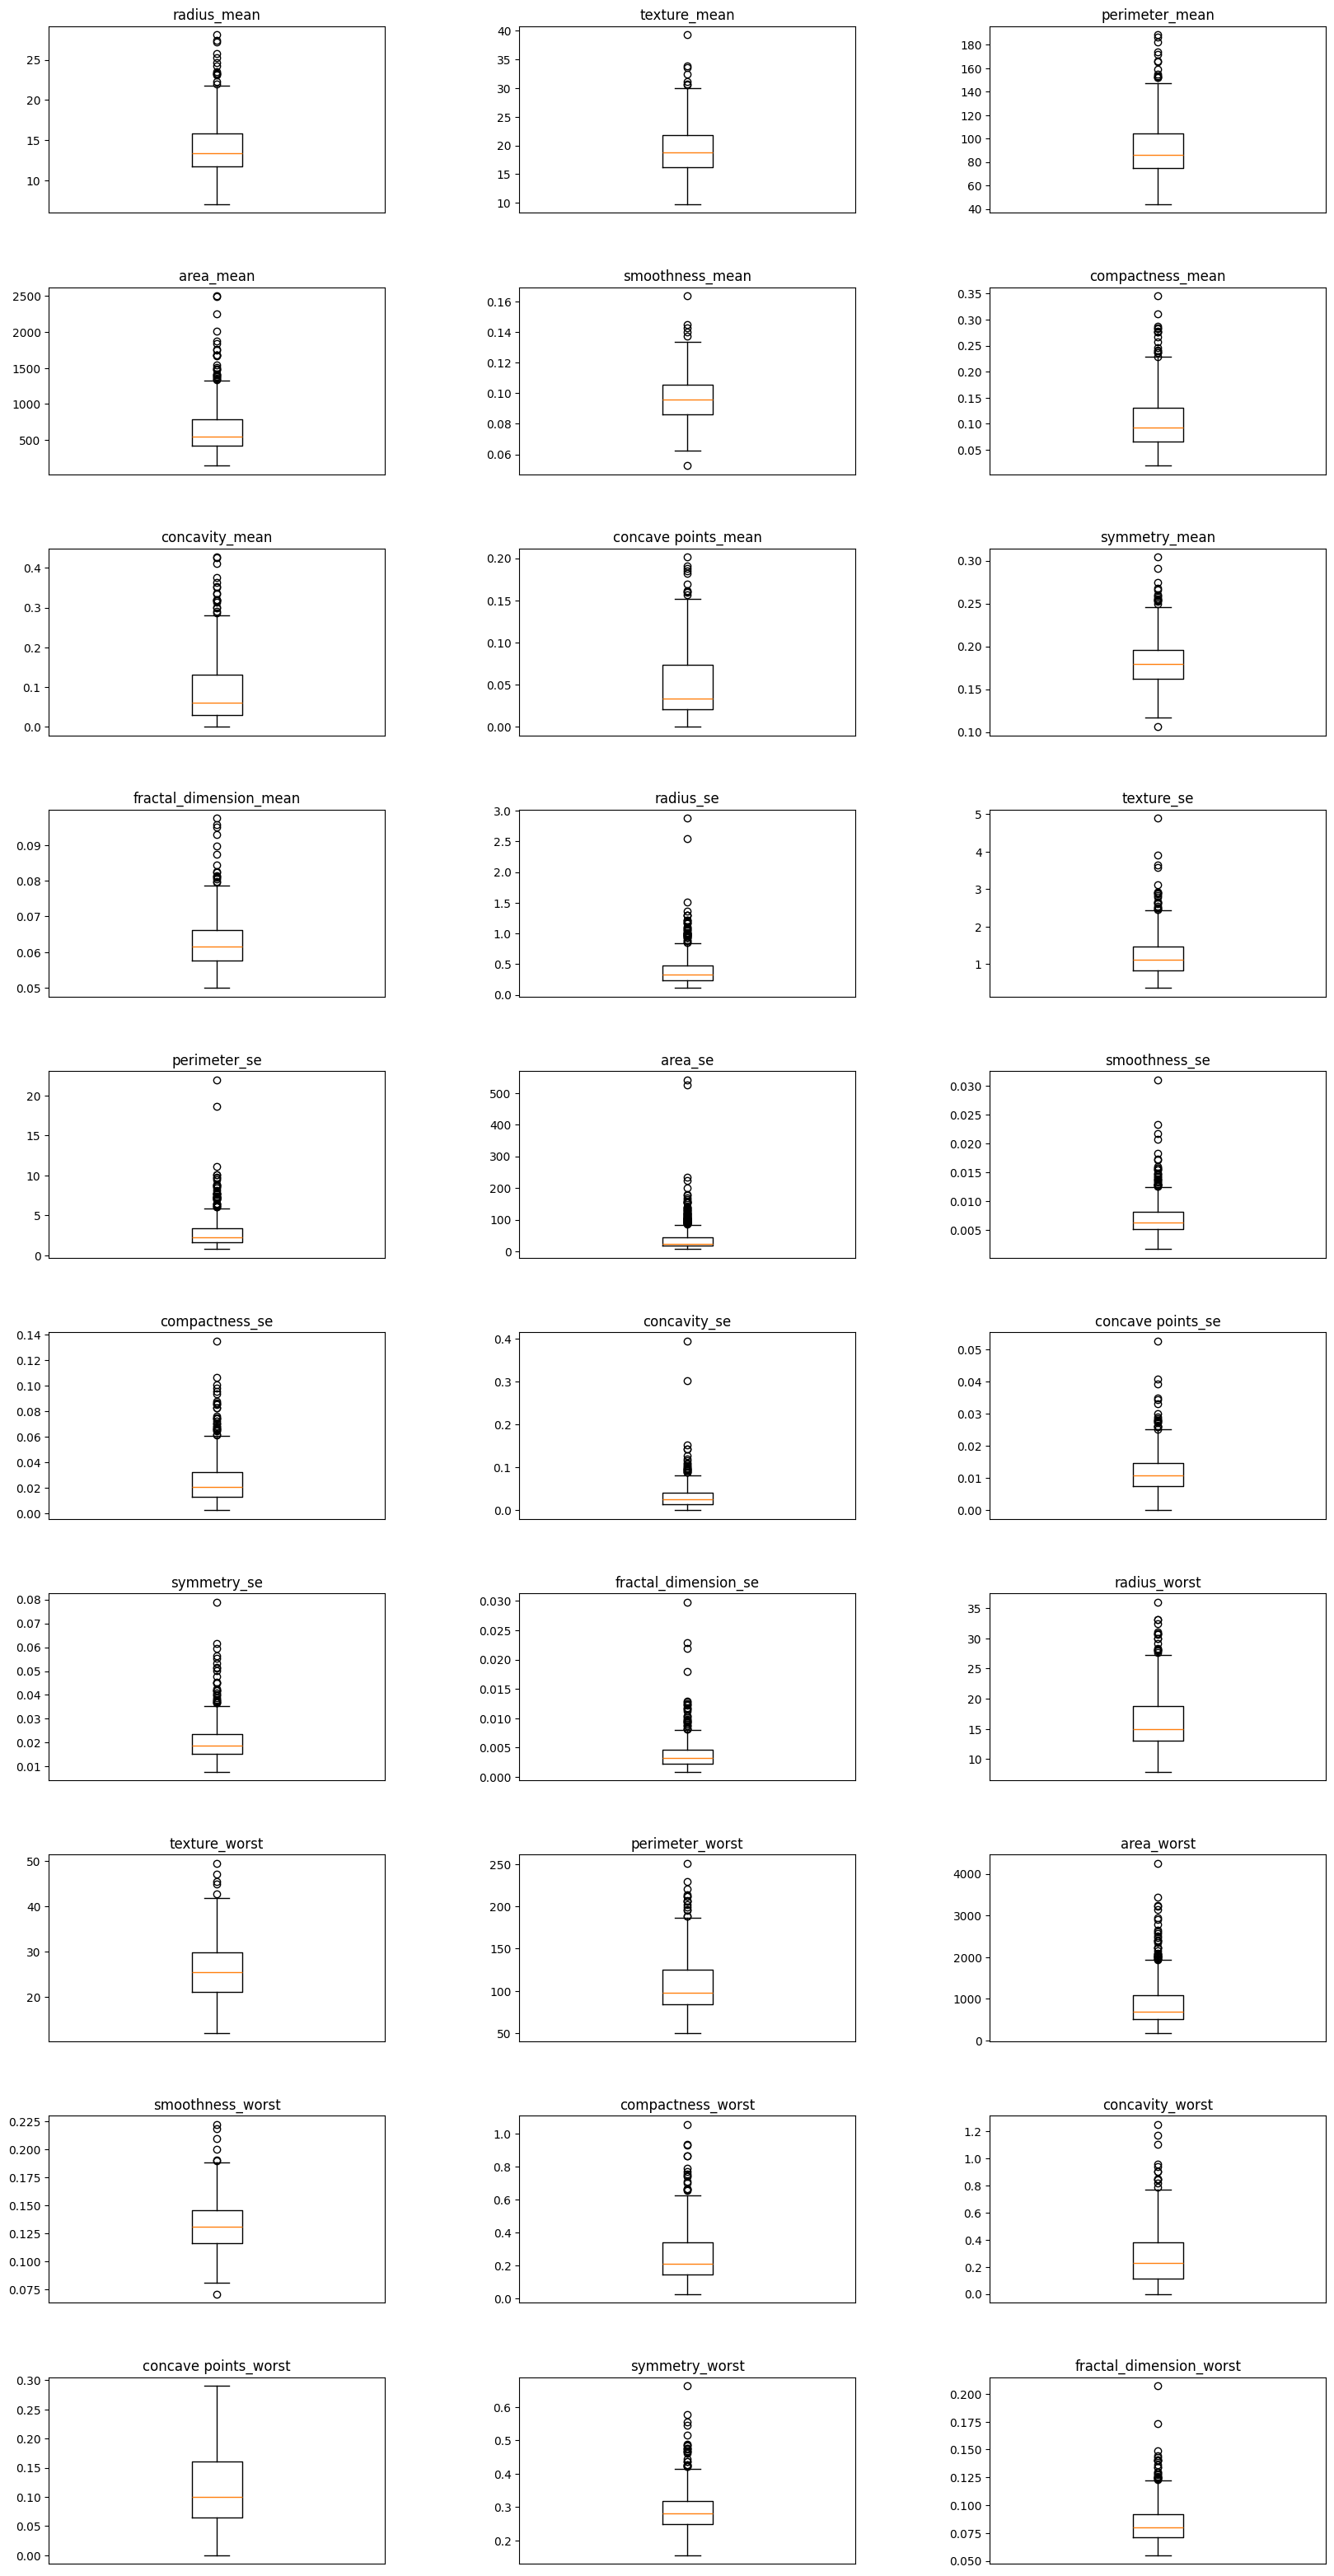

In [11]:
plt.figure(figsize = (20, 40))
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 31):
    plt.subplot(10, 3, i)
    plt.boxplot(data.iloc[: , var_ind[i - 1]])
    plt.xticks([]) #remove the xticks 
    plt.title(data.columns[var_ind[i - 1]])

#### 5: Bivariate data analysis

#### Analysis of  diagnosis  on numeric variables

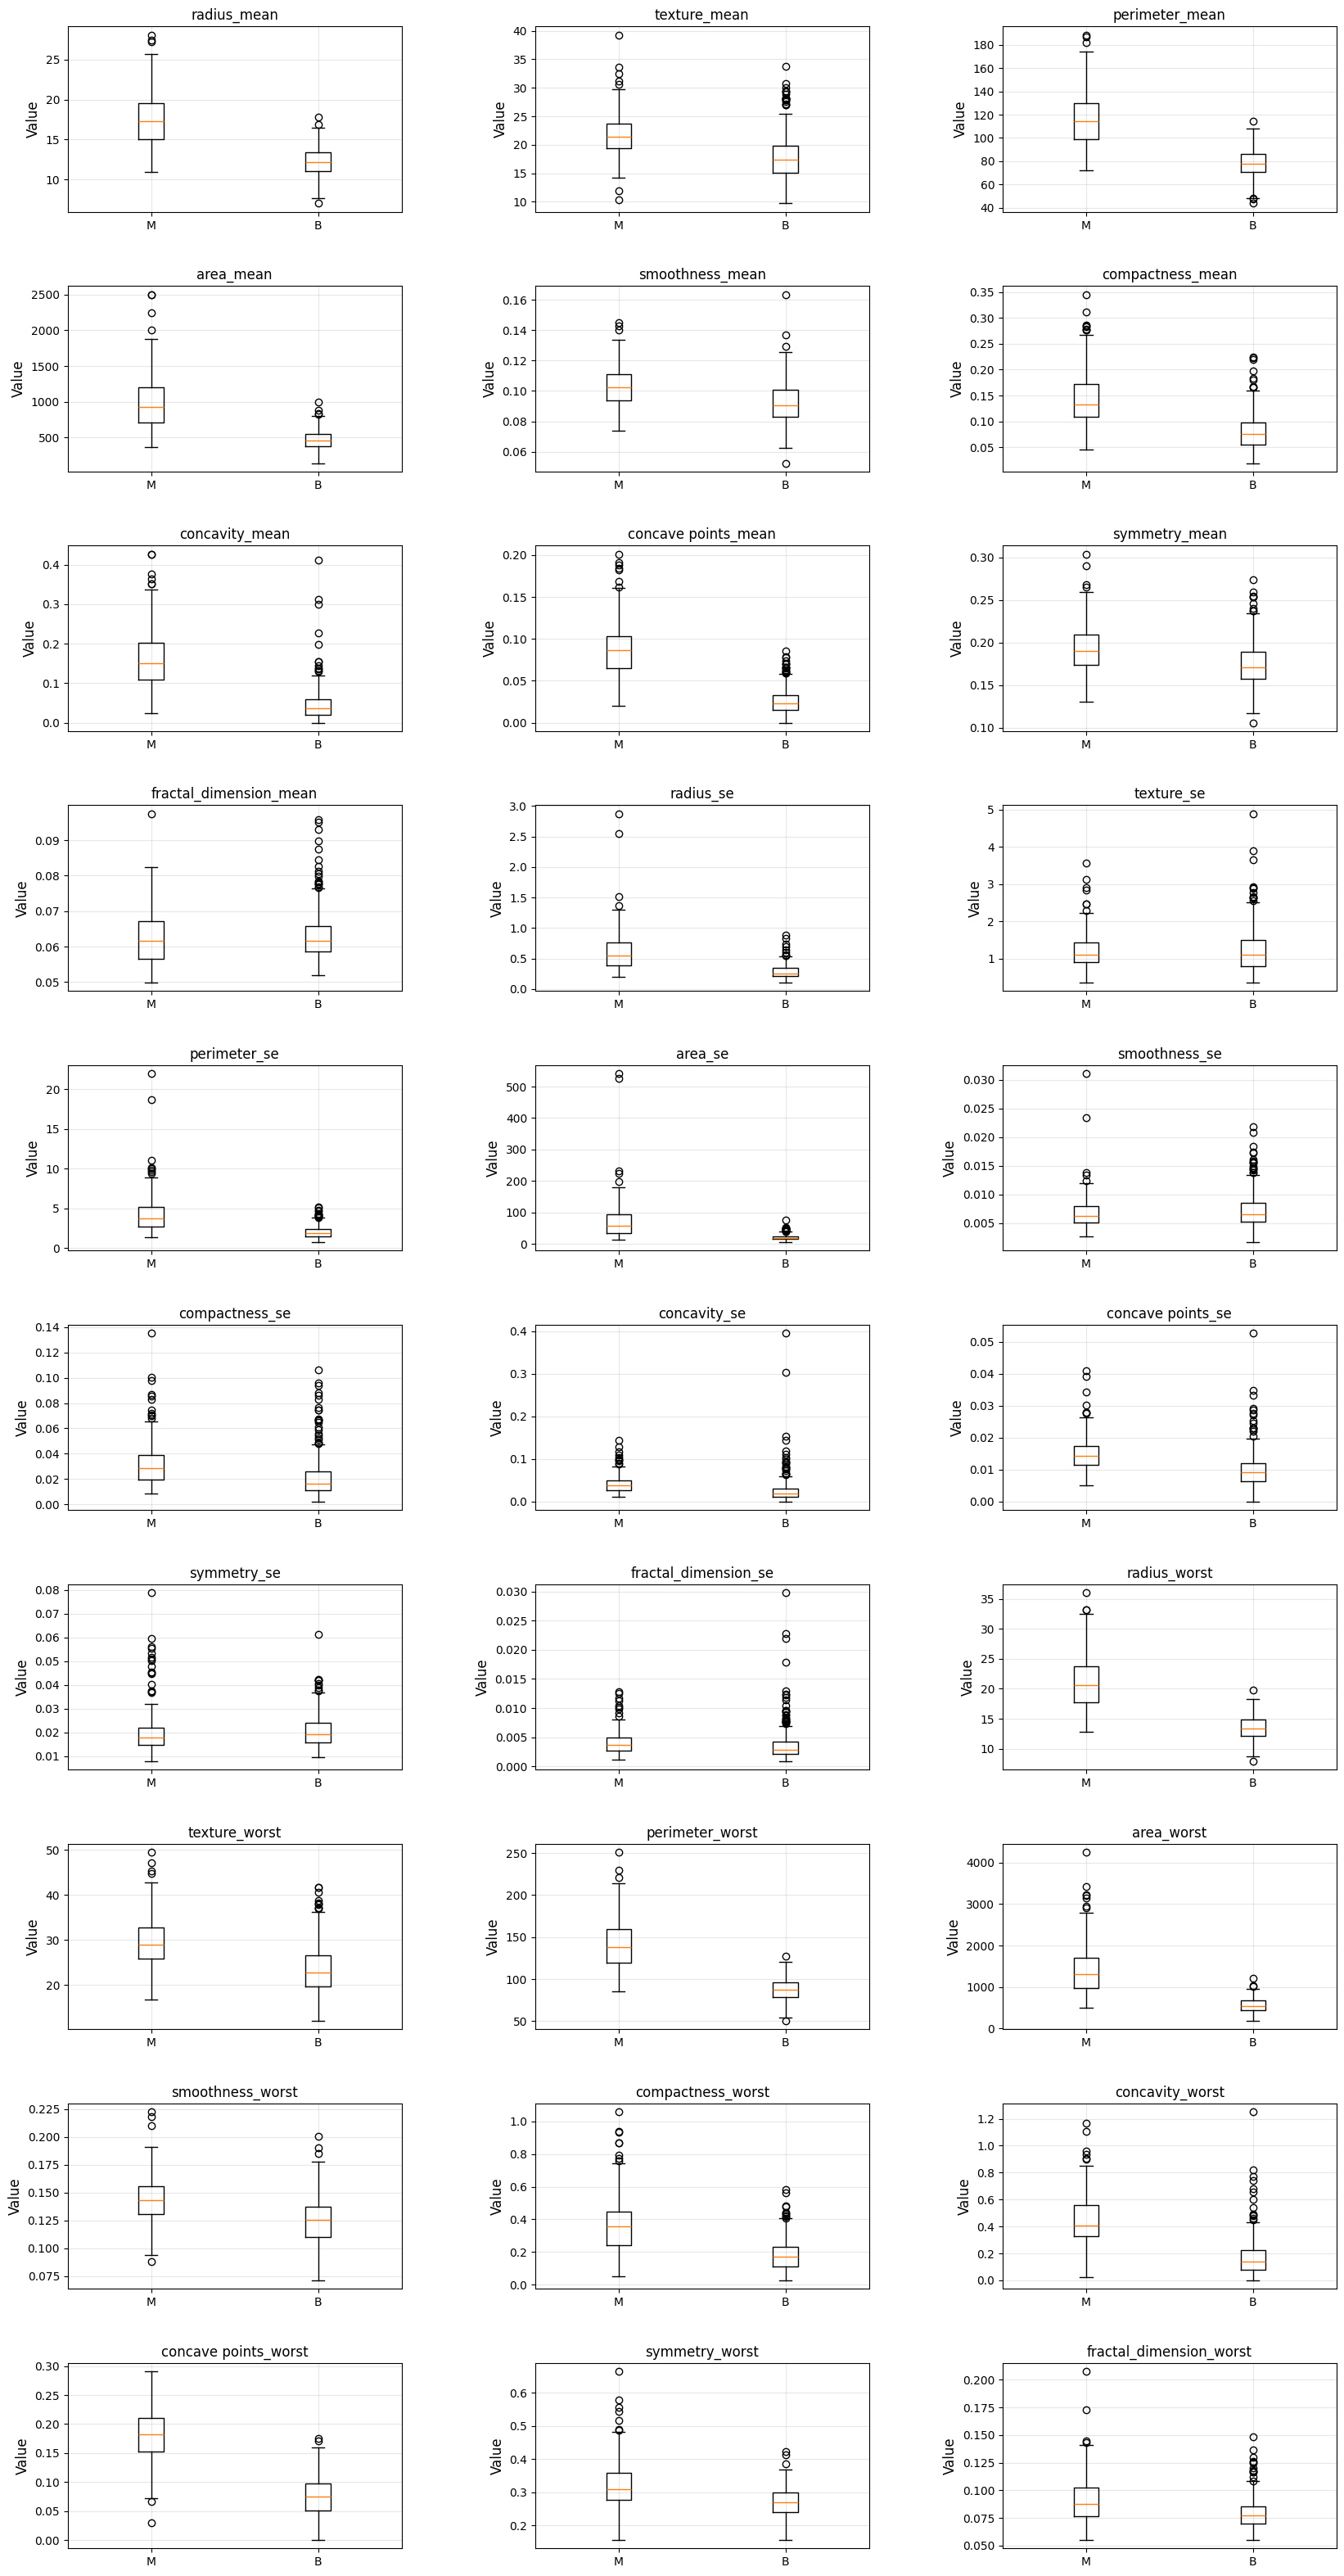

In [12]:
plt.figure(figsize = (20, 40))
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 31):
    plt.subplot(10, 3, i)
    plt.boxplot([
        data.loc[data['diagnosis'] == 'M', data.columns[var_ind[i-1]]],
        data.loc[data['diagnosis'] == 'B', data.columns[var_ind[i-1]]]
    ])
    plt.title(data.columns[var_ind[i-1]], fontsize=12)
    plt.xticks(ticks=[1, 2], labels=['M', 'B'])
    plt.ylabel('Value', fontsize=12)  
    plt.grid(True, alpha=0.3)

#### Correlation analysis

In [13]:
corr_table = round(data.iloc[:, var_ind].corr(method = 'pearson'), 2)
corr_table

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44
fractal_dimension_mean,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.25,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77


## Data Preparation

In [14]:
#Remove id
data.drop(columns = ['id','Unnamed: 32'], inplace = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Build Predictive Models

In [16]:
#Split data into test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, 
                               test_size = 0.2, 
                               random_state = 1234)
print(train.shape)
print(test.shape)

(455, 31)
(114, 31)


#### train data

In [17]:
#Define feature matrix 
X_train = train.drop(['diagnosis'], axis = 1)
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
518,12.88,18.22,84.45,493.1,0.12180,0.16610,0.04825,0.05303,0.1709,0.07253,...,15.05,24.37,99.31,674.7,0.14560,0.29610,0.12460,0.10960,0.2582,0.08893
551,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,0.06552,...,12.02,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032
111,12.63,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.06021,0.1735,0.07070,...,13.33,25.47,89.00,527.4,0.12870,0.22500,0.22160,0.11050,0.2226,0.08486
64,12.68,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.06873,0.1905,0.06590,...,17.09,33.47,111.80,888.3,0.18510,0.40610,0.40240,0.17160,0.3383,0.10310
443,10.57,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,0.2372,0.05768,...,10.94,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736


In [18]:
#Define response matrix
y_train = train['diagnosis']
y_train

518    B
551    B
111    B
64     M
443    B
      ..
279    B
372    M
204    B
53     M
294    B
Name: diagnosis, Length: 455, dtype: object

#### test data

In [19]:
#Define feature matrix 
X_test= test.drop(['diagnosis'], axis = 1)
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
531,11.670,20.02,75.21,416.2,0.10160,0.09453,0.04200,0.02157,0.1859,0.06461,...,13.35,28.81,87.00,550.6,0.1550,0.2964,0.27580,0.08120,0.3206,0.08950
166,10.800,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.1436,0.1257,0.10470,0.04603,0.2090,0.07699
485,12.450,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,0.2082,0.07325,...,13.78,21.03,97.82,580.6,0.1175,0.4061,0.48960,0.13420,0.3231,0.10340
66,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,0.06899,...,10.41,31.56,67.03,330.7,0.1548,0.1664,0.09412,0.06517,0.2878,0.09211
220,13.650,13.16,87.88,568.9,0.09646,0.08711,0.03888,0.02563,0.1360,0.06344,...,15.34,16.35,99.71,706.2,0.1311,0.2474,0.17590,0.08056,0.2380,0.08718


In [20]:
y_test = test['diagnosis']
y_test

531    B
166    B
485    B
66     B
220    B
      ..
160    B
27     M
92     B
171    M
461    M
Name: diagnosis, Length: 114, dtype: object

# Decision tree

#### Create hyper-parameters grid Decision tree

In [21]:
max_depth = [5, 10, 15, 20, 50,60]
min_samples_leaf = [5, 10 ,15,20,30,40]
params_grid = list(itertools.product( max_depth, 
                                     min_samples_leaf))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 37), 
                           columns = ['max_depth', 
                                      'min_samples_leaf'])
params_grid

,max_depth,min_samples_leaf
1,5,5
2,5,10
3,5,15
4,5,20
5,5,30
6,5,40
7,10,5
8,10,10
9,10,15
10,10,20


#### K-fold cross validation to choose the best model

In [22]:
cv_scores = np.zeros(shape=len(params_grid)) 

start_time = time.time()
for i in range(len(params_grid)):
    DT_classifier = DecisionTreeClassifier(max_depth=params_grid.iloc[i, 0], 
                                           min_samples_leaf=params_grid.iloc[i, 1],
                                           class_weight='balanced',
                                           criterion='gini')
    scores = cross_val_score(estimator=DT_classifier, 
                             X=X_train,  
                             y=y_train,
                             scoring='roc_auc',
                             cv=5, n_jobs=-1)
    cv_scores[i] = scores.mean()
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  10.058367490768433 seconds


In [23]:
#Best model
params_grid.iloc[np.argmax(cv_scores), :]

max_depth            5
min_samples_leaf    15
Name: 3, dtype: int64

In [24]:
#Train model 1
model_1 = DecisionTreeClassifier(criterion = 'gini',
                                 max_depth = params_grid.iloc[np.argmax(cv_scores), 0], 
                                 min_samples_leaf = params_grid.iloc[np.argmax(cv_scores), 1], 
                                 random_state = 1234)


#Fit the lrandom forest classifier on the train
model_1.fit(X_train, y_train)

#Predict class in the test
y_test_pred_1 = pd.Series(model_1.predict(X_test), index=test.index)  
y_test_pred_1

531    B
166    B
485    B
66     B
220    B
      ..
160    B
27     M
92     B
171    M
461    M
Length: 114, dtype: object

### Model evaluation in the test - model 1

In [25]:
models_comp = pd.DataFrame({'Accuracy': accuracy_score(test['diagnosis'], y_test_pred_1),
                            
                            'Precision': precision_score(test['diagnosis'], 
                                                y_test_pred_1,pos_label='M'),
                            
                            'Recall': recall_score(test['diagnosis'], 
                                                y_test_pred_1,pos_label='M'),
                            
                            'F1 Score': f1_score(test['diagnosis'], 
                                                y_test_pred_1,pos_label='M'),
                            
                            'F2 Score': fbeta_score(test['diagnosis'], 
                                                y_test_pred_1, beta = 2,pos_label='M')},
                           
                            index = ['Decision tree - Tuned - All features'])

models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision tree - Tuned - All features,0.921053,0.928571,0.866667,0.896552,0.878378


### Confusion matrix - model 1

In [26]:
confusion_matrix(test['diagnosis'], y_test_pred_1)

array([[66,  3],
       [ 6, 39]])

# Decision tree with Feature selection

### Feature selection

In [27]:
rfe = RFECV(DecisionTreeClassifier(), cv = 10, scoring = 'roc_auc')
rfe.fit(X_train, y_train)
print(rfe.support_)

[False False False False False False False False False False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [28]:
#Selected features indices
selected_features_ind = np.where(rfe.support_)
selected_features_ind

(array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29]),)

In [29]:
#Train model 2
model_2 = DecisionTreeClassifier(criterion = 'gini',
                                 max_depth =60, 
                                 min_samples_leaf = 15, 
                                 random_state = 1234)


#Fit the lrandom forest classifier on the train
model_2.fit(X_train.iloc[:,selected_features_ind[0]], y_train)

#Predict class in the test
y_test_pred_2 = pd.Series(model_2.predict(X_test.iloc[:,selected_features_ind[0]]), index=test.index)  
y_test_pred_2

531    B
166    B
485    B
66     B
220    B
      ..
160    B
27     M
92     B
171    M
461    M
Length: 114, dtype: object

### Model evaluation in the test - model 2

In [30]:
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['diagnosis'], 
                                                                  y_test_pred_2),
                                       'Precision': precision_score(test['diagnosis'], 
                                                                    y_test_pred_2,pos_label='M'),
                                       'Recall': recall_score(test['diagnosis'], 
                                                              y_test_pred_2,pos_label='M'),
                                       'F1 Score': f1_score(test['diagnosis'], 
                                                            y_test_pred_2,pos_label='M'),
                                       'F2 Score': fbeta_score(test['diagnosis'], 
                                                               y_test_pred_2, beta = 2,pos_label='M')
                                      }, 
                                    index = ['Decision tree - Tuned - Selected features'])])

models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision tree - Tuned - All features,0.921053,0.928571,0.866667,0.896552,0.878378
Decision tree - Tuned - Selected features,0.921053,0.950000,0.844444,0.894118,0.863636


In [31]:
confusion_matrix(test['diagnosis'], y_test_pred_2)

array([[67,  2],
       [ 7, 38]])

# Random Forest

In [32]:
#Create hyper-parameters grid
n_estimators = [100, 200, 500]
max_features = ['sqrt', 'log2', None] #If None or 1.0, then max_features = n_features
max_depth = [5, 10, 15]
min_samples_leaf = [5, 10, 15]

params_grid = list(itertools.product(n_estimators, 
                                     max_features, 
                                     max_depth, 
                                     min_samples_leaf))

params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 82), 
                           columns = ['n_estimators', 
                                      'max_features', 
                                      'max_depth', 
                                      'min_samples_leaf'])
params_grid

,n_estimators,max_features,max_depth,min_samples_leaf
1,100,sqrt,5,5
2,100,sqrt,5,10
3,100,sqrt,5,15
4,100,sqrt,10,5
5,100,sqrt,10,10
...,...,...,...,...
77,500,None,10,10
78,500,None,10,15
79,500,None,15,5
80,500,None,15,10


In [33]:
cv_scores = np.zeros(shape=len(params_grid)) 

start_time = time.time()
for i in range(len(params_grid)):
    rf_classifier = RandomForestClassifier(n_estimators=params_grid.iloc[i, 0],
                                           max_features=params_grid.iloc[i, 1], 
                                           criterion='gini',
                                           max_depth=params_grid.iloc[i, 2], 
                                           min_samples_leaf=params_grid.iloc[i, 3],
                                           ccp_alpha=0)
    scores = cross_val_score(estimator=rf_classifier, 
                             X=X_train,  
                             y=y_train,
                             scoring='roc_auc',
                             cv=5, n_jobs=-1)
    cv_scores[i] = scores.mean()
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  256.9532973766327 seconds


In [34]:
#Best model
params_grid.iloc[np.argmax(cv_scores), :]

n_estimators         100
max_features        sqrt
max_depth              5
min_samples_leaf       5
Name: 1, dtype: object

In [35]:
#Train model 3
model_3 = RandomForestClassifier(n_estimators = params_grid.iloc[np.argmax(cv_scores), 0],
                                 max_features = params_grid.iloc[np.argmax(cv_scores), 1], 
                                 criterion = 'gini',
                                 max_depth = params_grid.iloc[np.argmax(cv_scores), 2], 
                                 min_samples_leaf = params_grid.iloc[np.argmax(cv_scores), 3], 
                                 ccp_alpha = 0,
                                 random_state = 1234)


#Fit the lrandom forest classifier on the train
model_3.fit(X_train, y_train)

#Predict class in the test
y_test_pred_3 = pd.Series(model_3.predict(X_test), index=test.index)  
y_test_pred_3

531    B
166    B
485    B
66     B
220    B
      ..
160    B
27     M
92     B
171    M
461    M
Length: 114, dtype: object

### Model evaluation in the test - model 3

In [36]:
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['diagnosis'], 
                                                                  y_test_pred_3),
                                       'Precision': precision_score(test['diagnosis'], 
                                                                    y_test_pred_3,pos_label='M'),
                                       'Recall': recall_score(test['diagnosis'], 
                                                              y_test_pred_3,pos_label='M'),
                                       'F1 Score': f1_score(test['diagnosis'], 
                                                            y_test_pred_3,pos_label='M'),
                                       'F2 Score': fbeta_score(test['diagnosis'], 
                                                               y_test_pred_3, beta = 2,pos_label='M')
                                      }, 
                                      index = ['Random Forest - Tuned - All features'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision tree - Tuned - All features,0.921053,0.928571,0.866667,0.896552,0.878378
Decision tree - Tuned - Selected features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - All features,0.921053,0.950000,0.844444,0.894118,0.863636


# Random forest with feature selection

In [37]:
rfe = RFECV(RandomForestClassifier(), cv = 10, scoring = 'roc_auc')
rfe.fit(X_train, y_train)
print(rfe.support_)

[ True  True  True  True False  True  True  True False False  True False
  True  True False False False False False False  True  True  True  True
  True  True  True  True  True  True]


In [38]:
#Selected features indices
selected_features_ind = np.where(rfe.support_)
selected_features_ind

(array([ 0,  1,  2,  3,  5,  6,  7, 10, 12, 13, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29]),)

In [39]:
#Train model 4
model_4 = RandomForestClassifier(n_estimators = 200,
                                 max_features = 'log2' , 
                                 criterion = 'gini',
                                 max_depth = 5, 
                                 min_samples_leaf = 5 , 
                                 ccp_alpha = 0,
                                 random_state = 1234)


#Fit the lrandom forest classifier on the train
model_4.fit(X_train.iloc[:,selected_features_ind[0]], y_train)

#Predict class in the test
y_test_pred_4 = pd.Series(model_4.predict(X_test.iloc[:,selected_features_ind[0]]), index=test.index)  
y_test_pred_4

531    B
166    B
485    B
66     B
220    B
      ..
160    B
27     M
92     B
171    M
461    M
Length: 114, dtype: object

### Model evaluation in the test - model 4

In [40]:
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['diagnosis'], 
                                                                  y_test_pred_4),
                                       'Precision': precision_score(test['diagnosis'], 
                                                                    y_test_pred_4,pos_label='M'),
                                       'Recall': recall_score(test['diagnosis'], 
                                                              y_test_pred_4,pos_label='M'),
                                       'F1 Score': f1_score(test['diagnosis'], 
                                                            y_test_pred_4,pos_label='M'),
                                       'F2 Score': fbeta_score(test['diagnosis'], 
                                                               y_test_pred_4, beta = 2,pos_label='M')
                                      }, 
                                      index = ['Random Forest - Tuned - selected features'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision tree - Tuned - All features,0.921053,0.928571,0.866667,0.896552,0.878378
Decision tree - Tuned - Selected features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - All features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - selected features,0.921053,0.950000,0.844444,0.894118,0.863636


# Stochastic Gradient Boost

#### Create hyper-parameters grid for SGB

In [41]:
learning_rate = [0.001, 0.008, 0.1, 0.3]
n_estimators = [100, 200]
subsample = [0.5, 0.9]
max_depth = [5, 10]
min_samples_leaf = [5, 10]

params_grid = list(itertools.product(learning_rate, 
                                    n_estimators, 
                                    subsample, 
                                    max_depth, 
                                    min_samples_leaf))

params_grid = pd.DataFrame(data=params_grid,
                           index=range(1, 65), 
                           columns=['learning_rate',  # اصلاح: تمام 5 ستون
                                    'n_estimators', 
                                    'subsample', 
                                    'max_depth', 
                                    'min_samples_leaf'])

params_grid

,learning_rate,n_estimators,subsample,max_depth,min_samples_leaf
1,0.001,100,0.5,5,5
2,0.001,100,0.5,5,10
3,0.001,100,0.5,10,5
4,0.001,100,0.5,10,10
5,0.001,100,0.9,5,5
...,...,...,...,...,...
60,0.300,200,0.5,10,10
61,0.300,200,0.9,5,5
62,0.300,200,0.9,5,10
63,0.300,200,0.9,10,5


In [42]:
cv_scores = np.zeros(shape=len(params_grid)) 

start_time = time.time()

for i in range(len(params_grid)):
    GB_classifier = GradientBoostingClassifier(learning_rate=params_grid.iloc[i, 0],
                                               n_estimators=params_grid.iloc[i, 1],
                                               subsample=params_grid.iloc[i, 2], 
                                               max_depth=params_grid.iloc[i, 3], 
                                               min_samples_leaf=params_grid.iloc[i, 4],
                                               ccp_alpha=0,
                                               random_state = 1234)
    
    scores = cross_val_score(estimator=GB_classifier, 
                             X=X_train,  
                             y=y_train,
                             scoring='roc_auc',
                             cv=5, n_jobs=-1)
    cv_scores[i] = scores.mean()
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  291.37259817123413 seconds


In [43]:
#Best model
params_grid.iloc[np.argmax(cv_scores), :]

learning_rate         0.3
n_estimators        100.0
subsample             0.9
max_depth            10.0
min_samples_leaf     10.0
Name: 56, dtype: float64

## Scale

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
#SGB classifier (tuned) - model 5

#Create SGB regressor model
model_5 = GradientBoostingClassifier(learning_rate = params_grid.iloc[np.argmax(cv_scores), 0],    #learning rate
                                     n_estimators =  params_grid.iloc[np.argmax(cv_scores), 1],    #the total number of trees to fit
                                     subsample =     params_grid.iloc[np.argmax(cv_scores), 2],    #the fraction of samples to be used,#if .< 1, Stochastic GB
                                     max_depth =     params_grid.iloc[np.argmax(cv_scores), 3],    #the maximum depth of each tree
                                     min_samples_leaf =params_grid.iloc[np.argmax(cv_scores), 4],  #the minimum number of observations in the leaf nodes of the trees
                                     ccp_alpha = 0, 
                                     random_state = 1234)

#Fit the SGB classifier on the train
model_5.fit(X_train_scaled, y_train)

#Predict class in the test
y_test_pred_5 = pd.Series(model_5.predict(X_test_scaled), index = test.index)
y_test_pred_5

531    B
166    B
485    B
66     B
220    B
      ..
160    B
27     M
92     B
171    M
461    M
Length: 114, dtype: object

### Model evaluation in the test - model 5

In [46]:
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['diagnosis'], 
                                                                  y_test_pred_5),
                                       'Precision': precision_score(test['diagnosis'], 
                                                                    y_test_pred_5,pos_label='M'),
                                       'Recall': recall_score(test['diagnosis'], 
                                                              y_test_pred_5,pos_label='M'),
                                       'F1 Score': f1_score(test['diagnosis'], 
                                                            y_test_pred_5,pos_label='M'),
                                       'F2 Score': fbeta_score(test['diagnosis'], 
                                                               y_test_pred_5, beta = 2,pos_label='M')
                                      }, 
                                      index = ['SGB - Tuned & Scaled - All features'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision tree - Tuned - All features,0.921053,0.928571,0.866667,0.896552,0.878378
Decision tree - Tuned - Selected features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - All features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - selected features,0.921053,0.950000,0.844444,0.894118,0.863636
SGB - Tuned & Scaled - All features,0.947368,1.000000,0.866667,0.928571,0.890411


# GradientBoosting with feature selection

In [47]:
rfe = RFECV(GradientBoostingClassifier(), cv = 10, scoring = 'roc_auc')
rfe.fit(X_train_scaled, y_train)
print(rfe.support_)

[False  True False  True  True False False  True False False  True False
 False  True False False False False False False  True  True  True  True
  True False  True  True False  True]


In [48]:
#Selected features indices
selected_features_ind = np.where(rfe.support_)
selected_features_ind

(array([ 1,  3,  4,  7, 10, 13, 20, 21, 22, 23, 24, 26, 27, 29]),)

In [49]:
print(type(X_train_scaled))  # باید <class 'numpy.ndarray'> باشد
print(type(X_test_scaled))   # باید <class 'numpy.ndarray'> باشد

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [50]:
#SGB classifier (tuned & selected_features) - model 6

#Create SGB regressor model
model_6 = GradientBoostingClassifier(learning_rate = params_grid.iloc[np.argmax(cv_scores), 0],    #learning rate
                                     n_estimators =  params_grid.iloc[np.argmax(cv_scores), 1],    #the total number of trees to fit
                                     subsample =     params_grid.iloc[np.argmax(cv_scores), 2],    #the fraction of samples to be used,#if .< 1, Stochastic GB
                                     max_depth =     params_grid.iloc[np.argmax(cv_scores), 3],    #the maximum depth of each tree
                                     min_samples_leaf =params_grid.iloc[np.argmax(cv_scores), 4],  #the minimum number of observations in the leaf nodes of the trees
                                     ccp_alpha = 0, 
                                     random_state = 1234)


model_6.fit(X_train_scaled[:, selected_features_ind[0]], y_train)


y_test_pred_6 = pd.Series(model_6.predict(X_test_scaled[:, selected_features_ind[0]]), index=test.index)
y_test_pred_6

531    B
166    B
485    B
66     B
220    B
      ..
160    B
27     M
92     B
171    M
461    M
Length: 114, dtype: object

### Model evaluation in the test - model 6

In [51]:
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['diagnosis'], 
                                                                  y_test_pred_6),
                                       'Precision': precision_score(test['diagnosis'], 
                                                                    y_test_pred_6,pos_label='M'),
                                       'Recall': recall_score(test['diagnosis'], 
                                                              y_test_pred_6,pos_label='M'),
                                       'F1 Score': f1_score(test['diagnosis'], 
                                                            y_test_pred_6,pos_label='M'),
                                       'F2 Score': fbeta_score(test['diagnosis'], 
                                                               y_test_pred_6, beta = 2,pos_label='M')
                                      }, 
                                      index = ['SGB - Tuned & Scaled - Selected features'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision tree - Tuned - All features,0.921053,0.928571,0.866667,0.896552,0.878378
Decision tree - Tuned - Selected features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - All features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - selected features,0.921053,0.950000,0.844444,0.894118,0.863636
SGB - Tuned & Scaled - All features,0.947368,1.000000,0.866667,0.928571,0.890411
SGB - Tuned & Scaled - Selected features,0.947368,1.000000,0.866667,0.928571,0.890411


# Support Vector Machine 

#### Create hyper-parameters grid for SVM

In [52]:
degree_grid = [2, 3, 4]

#C: Inverse of regularization strength; 
#  smaller values specify stronger regularization.
c_reg = 10 ** np.linspace(-4, 4, 9)

params_grid = list(itertools.product(degree_grid, c_reg))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 28), 
                           columns = ['degree_grid', 'c_reg'])
params_grid

,degree_grid,c_reg
1,2,0.0001
2,2,0.0010
3,2,0.0100
4,2,0.1000
5,2,1.0000
6,2,10.0000
7,2,100.0000
8,2,1000.0000
9,2,10000.0000
10,3,0.0001


#### K-fold cross validation to choose the best SVM model

In [53]:
cv_scores = np.zeros(shape = len(params_grid)) #to save cv results

start_time = time.time()

for i in range(len(params_grid)):
    svc = SVC(kernel = 'poly', 
              degree = params_grid.iloc[i, 0], 
              C = params_grid.iloc[i, 1])
    scores = cross_val_score(svc, 
                             X = X_train_scaled, 
                             y = y_train, 
                             cv = 5, scoring = 'roc_auc')
    cv_scores[i] = scores.mean()

    
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  2.47817063331604 seconds


In [54]:
#Best model
params_grid.iloc[np.argmax(cv_scores), :]

degree_grid     3.0
c_reg          10.0
Name: 15, dtype: float64

In [55]:
#Train model 7
svc = SVC(kernel = 'poly', 
          degree = params_grid.iloc[np.argmax(cv_scores), 0], 
          C = params_grid.iloc[np.argmax(cv_scores), 1])

#Fit the SVM on the train
model_7 = svc.fit(X_train_scaled, y_train)

#Predict class in the test
y_test_pred_7 = pd.Series(model_7.predict(X_test_scaled), index = test.index)
y_test_pred_7

531    B
166    B
485    B
66     B
220    B
      ..
160    B
27     M
92     B
171    B
461    M
Length: 114, dtype: object

### Model evaluation in the test - model 7

In [56]:
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['diagnosis'], 
                                                            y_test_pred_7),
                                       'Precision': precision_score(test['diagnosis'], 
                                                            y_test_pred_7,pos_label='M'),
                                       'Recall': recall_score(test['diagnosis'], 
                                                            y_test_pred_7,pos_label='M'),
                                       'F1 Score': f1_score(test['diagnosis'], 
                                                            y_test_pred_7,pos_label='M'),
                                       'F2 Score': fbeta_score(test['diagnosis'], 
                                                            y_test_pred_7, beta = 2,pos_label='M')
                                      }, 
                                      index = ['SVM - Tuned & Scaled - All features'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision tree - Tuned - All features,0.921053,0.928571,0.866667,0.896552,0.878378
Decision tree - Tuned - Selected features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - All features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - selected features,0.921053,0.950000,0.844444,0.894118,0.863636
SGB - Tuned & Scaled - All features,0.947368,1.000000,0.866667,0.928571,0.890411
SGB - Tuned & Scaled - Selected features,0.947368,1.000000,0.866667,0.928571,0.890411
SVM - Tuned & Scaled - All features,0.894737,0.971429,0.755556,0.850000,0.790698


# Support Vector Machine with RBF kernel(Radial Basis Function)

In [57]:
c_reg = 10 ** np.linspace(-4, 4, 9)  
gamma = ['scale', 'auto', 0.1, 1.0]  # مقادیر gamma برای کرنل RBF
params_grid_rbf = list(itertools.product(gamma,c_reg))
params_grid_rbf = pd.DataFrame(data=params_grid_rbf,
                               index=range(1,37),
                               columns=['gamma', 'C'])
params_grid_rbf 

,gamma,C
1,scale,0.0001
2,scale,0.0010
3,scale,0.0100
4,scale,0.1000
5,scale,1.0000
6,scale,10.0000
7,scale,100.0000
8,scale,1000.0000
9,scale,10000.0000
10,auto,0.0001


In [58]:
cv_scores_rbf = np.zeros(shape=len(params_grid_rbf))

start_time = time.time()

for i in range(len(params_grid_rbf)):
    svc_rbf = SVC(kernel='rbf', gamma=params_grid_rbf.iloc[i, 0]
                                 , C=params_grid_rbf.iloc[i, 1])
    
    scores = cross_val_score(svc_rbf, 
                             X_train_scaled, 
                             y_train, 
                             scoring='roc_auc', cv=5)
    cv_scores_rbf[i] = scores.mean()

end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  3.465576648712158 seconds


In [59]:
#Best model
params_grid_rbf.iloc[np.argmax(cv_scores_rbf), :]

gamma    scale
C          1.0
Name: 5, dtype: object

In [60]:
#Train model 8
model_8 = SVC(kernel='rbf', 
              gamma=params_grid_rbf.iloc[np.argmax(cv_scores_rbf), 0], 
              C=params_grid_rbf.iloc[np.argmax(cv_scores_rbf), 1])

#fit
model_8.fit(X_train_scaled, y_train)


y_test_pred_8 = pd.Series(model_8.predict(X_test_scaled), index=test.index)
y_test_pred_8

531    B
166    B
485    B
66     B
220    B
      ..
160    B
27     M
92     B
171    M
461    M
Length: 114, dtype: object

### Model evaluation in the test - model 8

In [61]:
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['diagnosis'], 
                                                            y_test_pred_8),
                                       'Precision': precision_score(test['diagnosis'], 
                                                            y_test_pred_8,pos_label='M'),
                                       'Recall': recall_score(test['diagnosis'], 
                                                            y_test_pred_8,pos_label='M'),
                                       'F1 Score': f1_score(test['diagnosis'], 
                                                            y_test_pred_8,pos_label='M'),
                                       'F2 Score': fbeta_score(test['diagnosis'], 
                                                            y_test_pred_8, beta = 2,pos_label='M')
                                      }, 
                                      index = ['SVM(kernel=RBF(Radial Basis Function)) - Tuned & Scaled - All features'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision tree - Tuned - All features,0.921053,0.928571,0.866667,0.896552,0.878378
Decision tree - Tuned - Selected features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - All features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - selected features,0.921053,0.950000,0.844444,0.894118,0.863636
SGB - Tuned & Scaled - All features,0.947368,1.000000,0.866667,0.928571,0.890411
SGB - Tuned & Scaled - Selected features,0.947368,1.000000,0.866667,0.928571,0.890411
SVM - Tuned & Scaled - All features,0.894737,0.971429,0.755556,0.850000,0.790698
SVM(kernel=RBF(Radial Basis Function)) - Tuned & Scaled - All features,0.956140,1.000000,0.888889,0.941176,0.909091


# Logistic Regression

In [70]:
#Logistic regression/imbalanced data - model 9
from sklearn.linear_model import LogisticRegression
model_9 = LogisticRegression(penalty = None, #None: no penalty, 
                                             #'l1': L1 Regularization, 
                                             #'l2': L2 Regularization
                             random_state = 1234,
                             max_iter = 100,
                             solver = 'lbfgs') #'lbfgs' for small sample, 
                                              #'saga' for large sample

#Fit the logistic regression on the train
model_9.fit(X_train_scaled, y_train)
print(model_9.coef_)
print(model_9.intercept_)

#Important points :
#Note: convergence problem
#Possible solutions: 
#  1- Increase the number of iterations
#  2- Try a different optimizer
#  3- Scale data 


#Predict probability in the train
y_train_prob_9 = model_9.predict_proba(X_train_scaled)
y_train_prob_9

[[ 13.02988629   1.05680822  10.21234798  11.25434877  -5.10377958
  -30.18938376  25.50180067  30.78552861  -5.71497086 -16.89008019
   41.85361457  -9.40232175  13.49428254  41.20070839  16.86082586
  -23.62166323  -2.7742422   10.74440308 -11.5021174  -30.82703792
   25.60818713  55.79933373  12.2342377   26.36707777  39.64813936
  -12.55521949  41.71481975  25.38839614  33.68918935  21.97095206]]
[-3.80343964]


array([[1.00000000e+000, 1.03972564e-062],
       [1.00000000e+000, 6.08684435e-117],
       [1.00000000e+000, 5.05421690e-072],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 6.47291419e-156],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 9.85237306e-151],
       [1.00000000e+000, 2.08333891e-071],
       [1.00000000e+000, 6.38280659e-084],
       [1.00000000e+000, 5.17985245e-085],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 4.99300784e-076],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 2.08540255e-123],
       [1.00000000e+000, 4.03362246e-106],
       [9.96675800e-001, 3.32420000e-003],
       [1.00000000e+000, 5.15203812e-069],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.43970180e-124],
       [1.29857525e-009, 9.99999999e-001],
       [1.00000000e+000, 3.59488335e-086],
       [1.00000000e+000, 2.37147216e-051],
       [9.9

### Plot ROC curve

Area under the ROC curve :  1.000


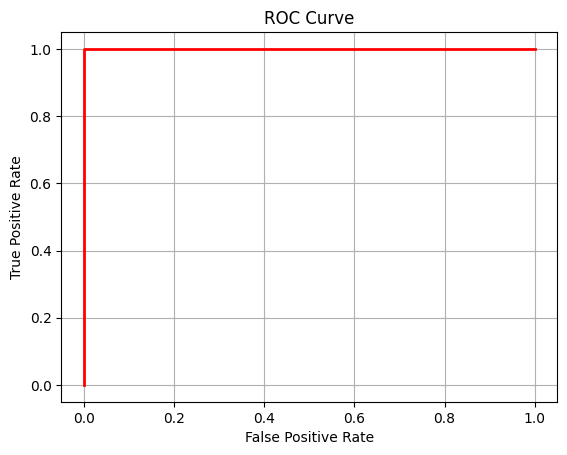

In [77]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def roc_plot(response, pred_prob):
    # Calculate false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(response, pred_prob, pos_label='M') 
    # Calculate area under curve
    print('Area under the ROC curve : {r: 0.3f}'.format(r=auc(fpr, tpr)))
    # Plot ROC curve
    plt.plot(fpr, tpr, c='red', linewidth=2)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    return plt.show()

# Plot ROC curve - model 9
roc_plot(y_train, y_train_prob_9[:, 1])

In [78]:
#Youden’s index for optimal cut-off probability 
def find_optimal_cutoff(response, pred_prob):
    #Calculate false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(response, pred_prob, pos_label='M') 
    #Calculate the optimal cut-off
    cutoff = thresholds[np.argmax(tpr - fpr)]
    return round(cutoff, 3)

In [80]:
#Find the optimal cut-off
cutoff_1 = find_optimal_cutoff(y_train, y_train_prob_9[:, 1])
print(cutoff_1)

0.989


In [86]:
#Predict class on train
y_train_pred_9 = pd.Series(['M' if _ > cutoff_1 else 'B' for _ in y_train_prob_9[:, 1]], 
                           index=y_train.index)
y_train_pred_9

518    B
551    B
111    B
64     M
443    B
      ..
279    B
372    M
204    B
53     M
294    B
Length: 455, dtype: object

In [87]:
#Predict probability in the test
y_test_prob_9 = model_9.predict_proba(X_test_scaled)

#Predict class in the test
y_test_pred_9 = pd.Series(['M' if _ > cutoff_1 else 'B' for _ in y_test_prob_9[:, 1]],
                          index=test.index)
y_test_pred_9

531    B
166    B
485    B
66     B
220    B
      ..
160    B
27     M
92     B
171    M
461    M
Length: 114, dtype: object

### Model evaluation in the test - model 9

In [88]:
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['diagnosis'], 
                                                            y_test_pred_9),
                                       'Precision': precision_score(test['diagnosis'], 
                                                            y_test_pred_9,pos_label='M'),
                                       'Recall': recall_score(test['diagnosis'], 
                                                            y_test_pred_9,pos_label='M'),
                                       'F1 Score': f1_score(test['diagnosis'], 
                                                            y_test_pred_9,pos_label='M'),
                                       'F2 Score': fbeta_score(test['diagnosis'], 
                                                            y_test_pred_9, beta = 2,pos_label='M')
                                      }, 
                                      index = ['Log reg -  Scaled - All features'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision tree - Tuned - All features,0.921053,0.928571,0.866667,0.896552,0.878378
Decision tree - Tuned - Selected features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - All features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - selected features,0.921053,0.950000,0.844444,0.894118,0.863636
SGB - Tuned & Scaled - All features,0.947368,1.000000,0.866667,0.928571,0.890411
SGB - Tuned & Scaled - Selected features,0.947368,1.000000,0.866667,0.928571,0.890411
SVM - Tuned & Scaled - All features,0.894737,0.971429,0.755556,0.850000,0.790698
SVM(kernel=RBF(Radial Basis Function)) - Tuned & Scaled - All features,0.956140,1.000000,0.888889,0.941176,0.909091
Log reg - Scaled - All features,0.964912,1.000000,0.911111,0.953488,0.927602


# Logistic Regression with Regularization

In [97]:
penalty = [ 'l2']
#C: Inverse of regularization strength; 
#  smaller values specify stronger regularization.
c_reg = 10 ** np.linspace(-3, 3, 40)
params_grid = list(itertools.product(penalty, c_reg))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 41), 
                           columns = ['penalty', 'c_reg'])
params_grid

,penalty,c_reg
1,l2,0.001000
2,l2,0.001425
3,l2,0.002031
4,l2,0.002894
5,l2,0.004125
6,l2,0.005878
7,l2,0.008377
8,l2,0.011938
9,l2,0.017013
10,l2,0.024245


In [98]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

cv_scores = np.zeros(shape = len(params_grid)) #to save cv results

import time #to measure the processing time
start_time = time.time()
for i in range(len(params_grid)):
    log_reg = LogisticRegression(penalty = params_grid.iloc[i, 0],
                                 C = params_grid.iloc[i, 1],
                                 max_iter = 100,
                                 solver = 'lbfgs')
    scores = cross_val_score(estimator = log_reg, 
                             X = X_train_scaled, 
                             y = y_train,
                             scoring = 'roc_auc',
                             cv = 10, n_jobs = -1)
    cv_scores[i] = scores.mean()
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  3.652311086654663 seconds


In [99]:
#Best model
params_grid.iloc[np.argmax(cv_scores), :]

penalty          l2
c_reg      3.455107
Name: 24, dtype: object

In [100]:
#Train model 4
#Fit the logistic regression on the train
model_10 = LogisticRegression(penalty = params_grid.iloc[np.argmax(cv_scores), 0],
                             C = params_grid.iloc[np.argmax(cv_scores), 1],
                             random_state = 1234,
                             max_iter = 500,
                             solver = 'lbfgs')
model_10.fit(X_train_scaled, y_train)
print(model_10.coef_)
print(model_10.intercept_)

[[ 8.93891952e-01  6.21377296e-01  8.30579382e-01  7.73130804e-01
   1.11472397e-01 -6.04501509e-01  1.13540976e+00  1.27097347e+00
   1.81287026e-03 -5.98344648e-01  1.68963818e+00 -5.59048709e-01
   7.39071114e-01  1.76550252e+00  5.05614628e-01 -8.92022242e-01
  -6.27418238e-02  5.71483604e-01 -4.74787798e-01 -1.10259832e+00
   1.28990984e+00  1.99741033e+00  8.64754999e-01  1.33829521e+00
   1.73192208e+00 -3.68105341e-01  1.54247379e+00  9.80027605e-01
   1.20140367e+00  6.65225657e-01]]
[-0.55039831]


In [102]:
#Predict probability in the train
y_train_prob_10 = model_10.predict_proba(X_train_scaled)

#Find the optimal cut-off
cutoff_2 = find_optimal_cutoff(y_train, y_train_prob_10[:, 1])
print(cutoff_2)

0.556


In [104]:
#Predict probability in the test
y_test_prob_10 = model_10.predict_proba(X_test_scaled)

#Predict class on test
y_test_pred_10 = pd.Series(['M' if _ > cutoff_2 else 'B' for _ in y_test_prob_10[:, 1]],
                          index = test.index)
y_test_pred_10

531    B
166    B
485    B
66     B
220    B
      ..
160    B
27     M
92     B
171    M
461    M
Length: 114, dtype: object

### Model evaluation on test - model 10

In [105]:
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['diagnosis'], 
                                                            y_test_pred_10),
                                       'Precision': precision_score(test['diagnosis'], 
                                                            y_test_pred_10,pos_label='M'),
                                       'Recall': recall_score(test['diagnosis'], 
                                                            y_test_pred_10,pos_label='M'),
                                       'F1 Score': f1_score(test['diagnosis'], 
                                                            y_test_pred_10,pos_label='M'),
                                       'F2 Score': fbeta_score(test['diagnosis'], 
                                                            y_test_pred_10, beta = 2,pos_label='M')
                                      }, 
                                      index = ['Log reg -  Regularization & Scaled - All features'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
Decision tree - Tuned - All features,0.921053,0.928571,0.866667,0.896552,0.878378
Decision tree - Tuned - Selected features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - All features,0.921053,0.950000,0.844444,0.894118,0.863636
Random Forest - Tuned - selected features,0.921053,0.950000,0.844444,0.894118,0.863636
SGB - Tuned & Scaled - All features,0.947368,1.000000,0.866667,0.928571,0.890411
SGB - Tuned & Scaled - Selected features,0.947368,1.000000,0.866667,0.928571,0.890411
SVM - Tuned & Scaled - All features,0.894737,0.971429,0.755556,0.850000,0.790698
SVM(kernel=RBF(Radial Basis Function)) - Tuned & Scaled - All features,0.956140,1.000000,0.888889,0.941176,0.909091
Log reg - Scaled - All features,0.964912,1.000000,0.911111,0.953488,0.927602
Log reg - Regularization & Scaled - All features,0.964912,1.000000,0.911111,0.953488,0.927602
